# Data Preprocessing




#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import joblib
import os

#### Reading the data set


In [2]:
data = pd.read_csv('daily_csv.csv')
data.head()




,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


# Handling the missing values

In [3]:
data['Price'] = data['Price'].fillna(data['Price'].mean())




#### Splitting The Dataset Into Dependent And Independent Variable

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

X = data[['year', 'month', 'day', 'day_of_week', 'is_weekend']]
y = data['Price']

#### Split The Dataset Into Train Set And Test Set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
#### Train The Model With  Decision Tree Regressor

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

# Data visualization

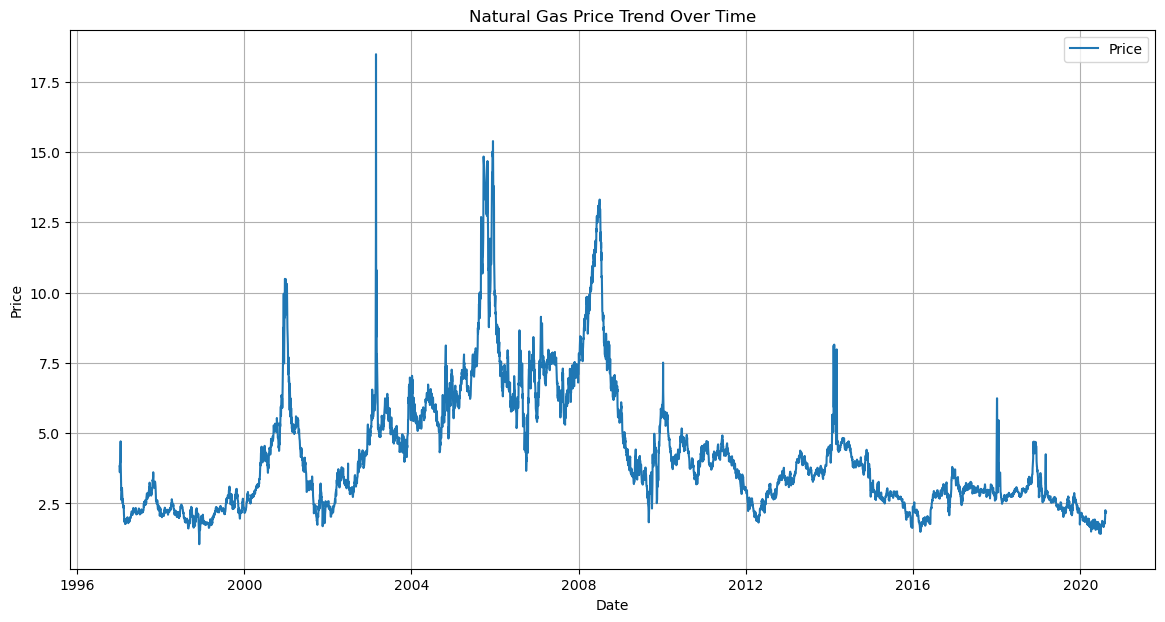

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Price Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Test The Model

In [8]:
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

mape = mean_absolute_percentage_error(y_test, predictions) * 100
print(f'Accuracy: {100 - mape:.2f}%')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2:.2f}')


joblib_path =  'gas.joblib'
joblib.dump({'model': model, 'scaler': scaler}, joblib_path)

Mean Absolute Error: 0.16416666666666666
Accuracy: 96.29%
R-squared: 0.97


['gas.joblib']